In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

- Leer archivo csv

In [2]:
mundial_info = pd.read_csv("/content/indicadores-mundiales.csv")

- Conocer qué columnas posee

In [3]:
sorted(mundial_info.columns)

['Ano',
 'Dias para iniciar un negocio',
 'Emisiones de CO2',
 'Esperanza de vida (mujeres)',
 'Esperanza de vida (varones)',
 'Facilidad para hacer negocios',
 'Gasto en salud ( del PIB)',
 'Gasto en salud (per capita)',
 'Horas preparar los impuestos',
 'Interes de prestamos',
 'PIB',
 'Pais',
 'Poblacion 0-14',
 'Poblacion 15-64',
 'Poblacion 65+',
 'Poblacion total',
 'Poblacion urbana',
 'Region',
 'Tasa de mortalidad infantil',
 'Tasa de natalidad',
 'Tasa tributaria empresarial',
 'Turismo emisor',
 'Turismo receptivo',
 'Uso de Internet',
 'Uso de energia',
 'Uso de telefonos celulares']

- Segmentación de columnas de interés (Región, País, Población Total, Emisiones de CO2).
- Ordenar por Región y País

In [4]:
mundial_info_segmented = mundial_info.loc[:, ["Region", "Pais", "Poblacion total", "Emisiones de CO2"]]
mundial_info_segmented_ordered = mundial_info_segmented.sort_values(by=["Region", "Pais"])
mundial_info_segmented_ordered = mundial_info_segmented.groupby(["Pais", "Region"]).mean().reset_index()

- Agrupar por región.
- Calcular promedio de población

In [5]:
mundial_info_population_region_grouped = mundial_info_segmented_ordered.groupby(["Region"])["Poblacion total"].transform("mean")
mundial_info_segmented_ordered["Población media por región"] = mundial_info_population_region_grouped

- Calcular promedio Emisiones CO2

In [6]:
mundial_info_co2_region_grouped = mundial_info_segmented_ordered.groupby(["Region"])["Emisiones de CO2"].transform("mean")
mundial_info_segmented_ordered["Emisiones CO2 media por región"] = mundial_info_co2_region_grouped

- Traer países con población por encima del promedio y con Emisiones por debajo del promedio

In [7]:
countries_less_co2_more_population = mundial_info_segmented_ordered[(mundial_info_segmented_ordered["Poblacion total"] > mundial_info_segmented_ordered["Población media por región"]) & (mundial_info_segmented_ordered["Emisiones de CO2"] < mundial_info_segmented_ordered["Emisiones CO2 media por región"])]

- Agrupar por país

In [8]:
df = countries_less_co2_more_population.groupby(["Pais", "Region"]).mean().sort_values(by=["Region"]).reset_index()
df["Poblacion total"] = df["Poblacion total"].astype("int64")
df["Emisiones de CO2"] = df["Emisiones de CO2"].astype("int64")
df["Población media por región"] = df["Población media por región"].astype("int64")
df["Emisiones CO2 media por región"] = df["Emisiones CO2 media por región"].astype("int64")
df

,Pais,Region,Poblacion total,Emisiones de CO2,Población media por región,Emisiones CO2 media por región
0,Banglades,Asia,136908013,33533,103688142,251142
1,Pakistan,Asia,149590829,115862,103688142,251142
2,Rumania,Europa,21866302,93834,16544558,153709
3,Argentina,Las Americas,37616632,137254,19079148,189751
4,Colombia,Las Americas,41214522,56470,19079148,189751
5,Peru,Las Americas,26543920,27757,19079148,189751
6,Venezuela,Las Americas,25102208,177576,19079148,189751
7,Papua Nueva Guinea,Oceania,5590441,3350,2111996,29021
8,Siria,Oriente Medio,16841336,48297,13265779,91285
9,Yemen,Oriente Medio,18296225,15990,13265779,91285


- Agrupar por región

In [9]:
df_to_plot = df.groupby(["Region"]).mean().reset_index()
df_to_plot["Poblacion total"] = df_to_plot["Poblacion total"].astype("int64")
df_to_plot

,Region,Poblacion total,Emisiones de CO2,Población media por región,Emisiones CO2 media por región
0,Asia,143249421,74697.500000,103688142.0,251142.0
1,Europa,21866302,93834.000000,16544558.0,153709.0
2,Las Americas,32619320,99764.250000,19079148.0,189751.0
3,Oceania,5590441,3350.000000,2111996.0,29021.0
4,Oriente Medio,20005503,49442.666667,13265779.0,91285.0
5,africa,28170206,4458.909091,15763515.0,18259.0


- Graficar población media de la región y población medio de los países filtrados de la región

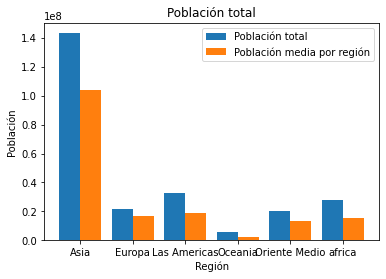

In [10]:
x_axis = df_to_plot["Region"]
y_axis = df_to_plot["Poblacion total"]
z_axis = df_to_plot["Población media por región"]
plt.bar(np.arange(len(x_axis)) - 0.2, y_axis, 0.4, label = "Población total")
plt.bar(np.arange(len(x_axis)) + 0.2, z_axis, 0.4, label = "Población media por región")
plt.xticks(np.arange(len(x_axis)), x_axis)
plt.xlabel("Región")
plt.ylabel("Población")
plt.title("Población total")
plt.legend()
plt.show()

- Graficar emisiones de CO2 media de la región y emisiones de CO2 media de los países filtrados

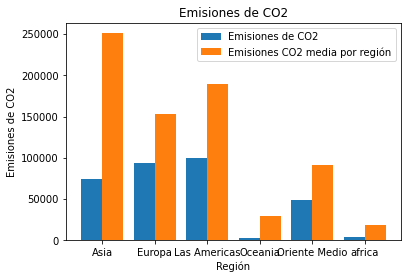

In [11]:
x_axis = df_to_plot["Region"]
y_axis = df_to_plot["Emisiones de CO2"]
z_axis = df_to_plot["Emisiones CO2 media por región"]
plt.bar(np.arange(len(x_axis)) - 0.2, y_axis, 0.4, label = "Emisiones de CO2")
plt.bar(np.arange(len(x_axis)) + 0.2, z_axis, 0.4, label = "Emisiones CO2 media por región")
plt.xticks(np.arange(len(x_axis)), x_axis)
plt.xlabel("Región")
plt.ylabel("Emisiones de CO2")
plt.title("Emisiones de CO2")
plt.legend()
plt.show()